# Test Notebook to learn how to read in various tide gauge records

### Some sources
https://www.psmsl.org/

http://www.ioc-sealevelmonitoring.org/

http://uhslc.soest.hawaii.edu/data/

### Load in some modules

In [6]:
import os
import numpy as np
import pandas as pd

%matplotlib inline

### Specify directories and filenames
and other runtime options

In [7]:
dir_in = 'data'
file_in = 'd820.csv'

### Basic `read_csv` to peek into the csv file

In [8]:
df = pd.read_csv(os.path.join(dir_in, file_in))

In [9]:
print(df)

      2014  7   5  4577
0     2014  7   6  4531
1     2014  7   7  4584
2     2014  7   8  4606
3     2014  7   9  4532
4     2014  7  10  4493
...    ... ..  ..   ...
2152  2020  5  27  4585
2153  2020  5  28  4518
2154  2020  5  29  4492
2155  2020  5  30  4483
2156  2020  5  31  4434

[2157 rows x 4 columns]


In [10]:
df = pd.read_csv(os.path.join(dir_in, file_in), header=None)
df

,0,1,2,3
0,2014,7,5,4577
1,2014,7,6,4531
2,2014,7,7,4584
3,2014,7,8,4606
4,2014,7,9,4532
...,...,...,...,...
2153,2020,5,27,4585
2154,2020,5,28,4518
2155,2020,5,29,4492
2156,2020,5,30,4483


In [11]:
column_names=['YEAR', 'MONTH', 'DAY', 'Z'] 
df = pd.read_csv(os.path.join(dir_in, file_in), names=column_names)
df

,YEAR,MONTH,DAY,Z
0,2014,7,5,4577
1,2014,7,6,4531
2,2014,7,7,4584
3,2014,7,8,4606
4,2014,7,9,4532
...,...,...,...,...
2153,2020,5,27,4585
2154,2020,5,28,4518
2155,2020,5,29,4492
2156,2020,5,30,4483


### Check the dataframe we created

In [12]:
df.describe()

,YEAR,MONTH,DAY,Z
count,2158.000000,2158.000000,2158.000000,2158.000000
mean,2016.960612,6.528267,15.760426,1870.912882
std,1.753948,3.476244,8.794916,9571.266027
min,2014.000000,1.000000,1.000000,-32767.000000
25%,2015.000000,3.000000,8.000000,4421.250000
50%,2017.000000,7.000000,16.000000,4498.000000
75%,2018.000000,10.000000,23.000000,4569.750000
max,2020.000000,12.000000,31.000000,4982.000000


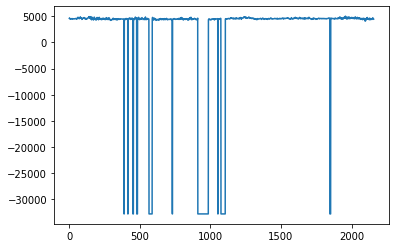

In [13]:
df['Z'].plot()

### set missing values to 'nan'

In [14]:
df['Z'] = df['Z'].replace(-32767, np.nan)

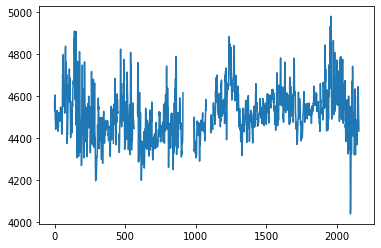

In [15]:
df['Z'].plot()

### create datetime column and set it to be the index

In [16]:
pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

0      2014-07-05
1      2014-07-06
2      2014-07-07
3      2014-07-08
4      2014-07-09
          ...    
2153   2020-05-27
2154   2020-05-28
2155   2020-05-29
2156   2020-05-30
2157   2020-05-31
Length: 2158, dtype: datetime64[ns]

In [17]:
df['DATETIME'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df = df.set_index('DATETIME')
df

,YEAR,MONTH,DAY,Z
DATETIME,,,,
2014-07-05,2014,7,5,4577.0
2014-07-06,2014,7,6,4531.0
2014-07-07,2014,7,7,4584.0
2014-07-08,2014,7,8,4606.0
2014-07-09,2014,7,9,4532.0
...,...,...,...,...
2020-05-27,2020,5,27,4585.0
2020-05-28,2020,5,28,4518.0
2020-05-29,2020,5,29,4492.0


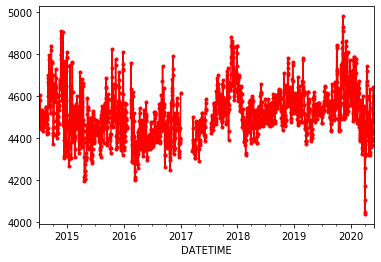

In [25]:
df['Z'].plot(color='red', marker='.')

### Zoom in using `set_xlim`

(4200, 4800)

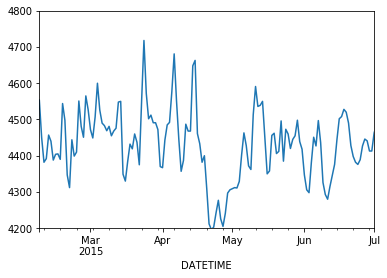

In [33]:
ax = df['Z'].plot()
ax.set_xlim(pd.Timestamp('2015-02-07'), pd.Timestamp('2015-07-01'))
ax.set_ylim(4200, 4800)

In [36]:
print(df['Z'].mean())

4514.105236907731


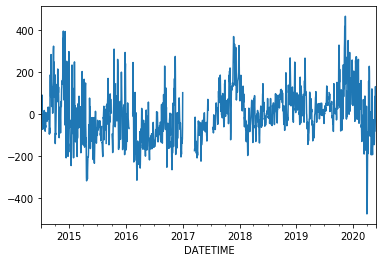

In [39]:
(df['Z'] - df['Z'].mean()).plot()

In [40]:
df['z_normal'] = (df['Z'] - df['Z'].mean())

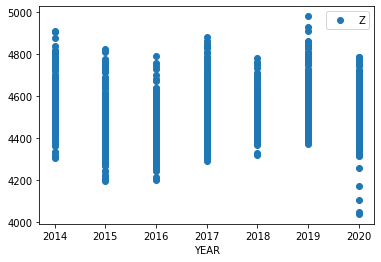

In [54]:
df.plot(x='YEAR', y='Z', marker='o', linestyle='')